# Iris Data Visualisation Practical

Let's apply what we've learned about data processing and visualisation in Iris and Cartopy with the following example and exercises:

* Example: Compare the output of two ensemble members
* Exercise 1: Compare the output of the A1B and E1 scenario
* Exercise 2: Plot the average annual temperature
* Exercise 3: Plot wind speeds over Lake Victoria

## Set up

In [1]:
import cartopy.feature as cfeat
import iris
import iris.analysis
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np

## Example: Compare the output of two ensemble members

**Step 1:** Use `iris.load` to load in the file `iris.sample_data_path("GloSea4", "ensemble_00[45].pp")` and print the cubes that are loaded.

In [2]:
cubes = iris.load(iris.sample_data_path("GloSea4", "ensemble_00[45].pp"))
print(cubes)

0: surface_temperature / (K)           (realization: 2; time: 6; latitude: 145; longitude: 192)


**Step 2:** Extract the "surface_temperature" cube with `cubes[0]` and assign it to `temp_cube`. Extract the first time step with `temp_cube[:, 0]`. Print the result.

In [3]:
temp_cube = cubes[0]
cube = temp_cube[:, 0]
print(cube)

surface_temperature / (K)           (realization: 2; latitude: 145; longitude: 192)
    Dimension coordinates:
        realization                             x            -               -
        latitude                                -            x               -
        longitude                               -            -               x
    Scalar coordinates:
        forecast_period             660.0 hours, bound=(288.0, 1032.0) hours
        forecast_reference_time     2011-07-20 00:00:00
        time                        2011-08-16 12:00:00, bound=(2011-08-01 00:00:00, 2011-09-01 00:00:00)
    Cell methods:
        mean                        time (1 hour)
    Attributes:
        STASH                       m01s00i024
        source                      'Data from Met Office Unified Model'
        um_version                  '7.6'


**Step 3:** Extract a cube with `iris.Constraint(realization=4)` and another cube with `iris.Constraint(realization=5)`. Print each cube.

In [4]:
ensemble_4 = cube.extract(iris.Constraint(realization=4))
ensemble_5 = cube.extract(iris.Constraint(realization=5))
print(ensemble_4)
print(ensemble_5)

surface_temperature / (K)           (latitude: 145; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        forecast_period             660.0 hours, bound=(288.0, 1032.0) hours
        forecast_reference_time     2011-07-20 00:00:00
        realization                 4
        time                        2011-08-16 12:00:00, bound=(2011-08-01 00:00:00, 2011-09-01 00:00:00)
    Cell methods:
        mean                        time (1 hour)
    Attributes:
        STASH                       m01s00i024
        source                      'Data from Met Office Unified Model'
        um_version                  '7.6'
surface_temperature / (K)           (latitude: 145; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar 

**Step 4:** Calculate the difference by subtracting one cube from another. Print the result.

In [5]:
difference = ensemble_4 - ensemble_5
print(difference)

unknown / (K)                       (latitude: 145; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        forecast_period             660.0 hours, bound=(288.0, 1032.0) hours
        forecast_reference_time     2011-07-20 00:00:00
        time                        2011-08-16 12:00:00, bound=(2011-08-01 00:00:00, 2011-09-01 00:00:00)
    Attributes:
        source                      'Data from Met Office Unified Model'
        um_version                  '7.6'


**Step 5:** Using `qplt.pcolormesh`, create a plot of the `difference` cube. Use `plt.show()` to show the result.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


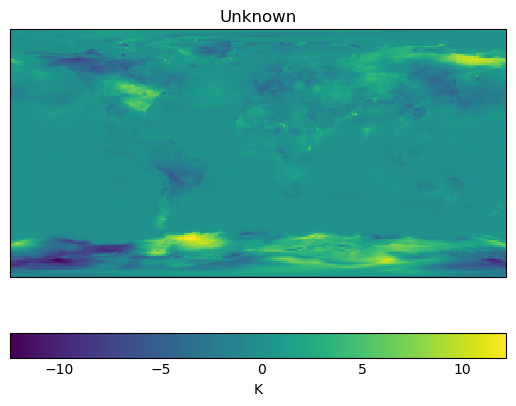

In [6]:
qplt.pcolormesh(difference)
plt.show()

**Step 6:** Repeat step 5, but this time:
* use the colormap `cmap="bwr"` in the `qplt.pcolormesh`
* set an appropriate title with `plt.title`
* Add coastlines with `plt.gca().coastlines()`

And use `plt.show()` to show the result.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


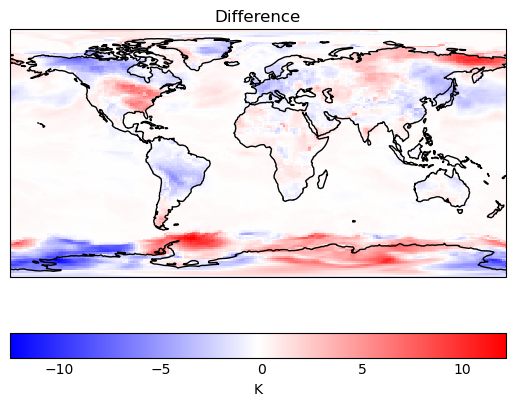

In [7]:
qplt.pcolormesh(difference, cmap="bwr")
plt.title('Difference')
plt.gca().coastlines()
plt.show()

**Step 6:** Now you are going to create 3 subplots, one subplot for `ensemble_4`, one subplot for `ensemble_5` and one subplot for the `difference` cube. 

* Use `plt.figure(figsize=(20,12))` to set the size of the figure

Then for each plot:
* Use `plt.subplot(1, 3, n)` to create each of the 3 subplots. _Note matplotlib uses 1-based counting_
* Use `qplt.pcolormesh` to plot the cube
    * When plotting the difference cube, use a colormap `cmap="bwr`
* Use `plt.title` to add a title of your choice
* Use `plt.gca().coastlines()` to "get the current axes" and add coastlines


And finally, use `plt.show()` to show the result.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um

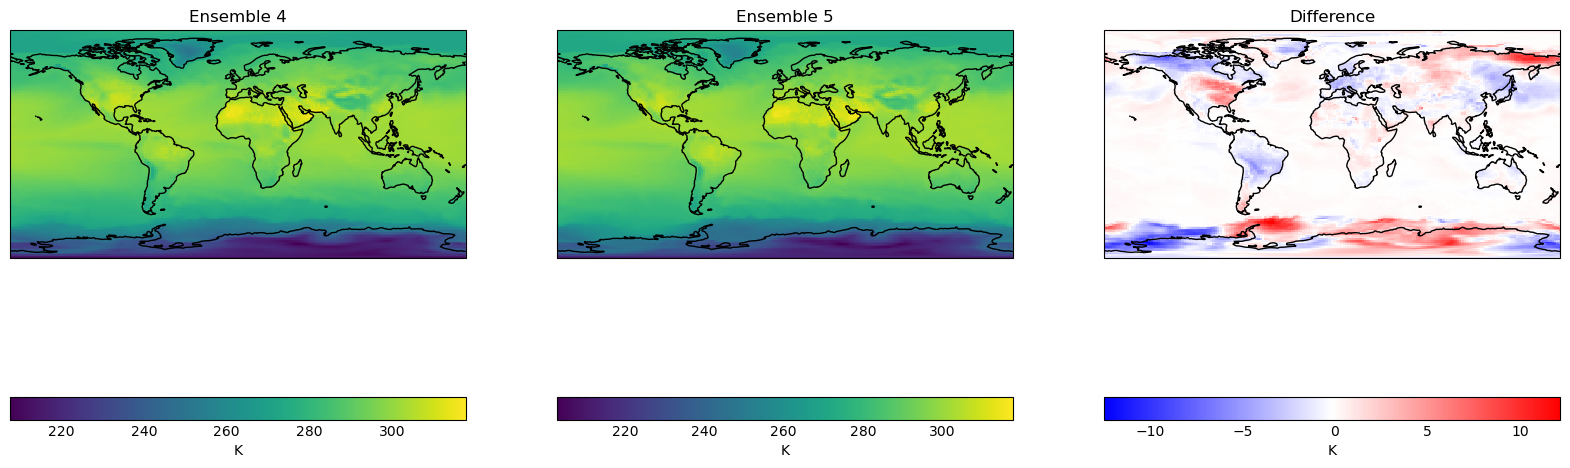

In [8]:
plt.figure(figsize=(20,12))

plt.subplot(1, 3, 1)
qplt.pcolormesh(ensemble_4)
plt.title("Ensemble 4")
plt.gca().coastlines()

plt.subplot(1, 3, 2)
qplt.pcolormesh(ensemble_5)
plt.title("Ensemble 5")
plt.gca().coastlines()

plt.subplot(1, 3, 3)
qplt.pcolormesh(difference, cmap="bwr")
plt.title('Difference')
plt.gca().coastlines()

plt.show()

## Exercise 1: Compare the output of the A1B and E1 scenario

**Step 1:** Use `iris.load` to load in the file containing data for the A1B scenario,  `iris.sample_data_path("A1B.2098.pp")` and assign this to a variable called `cubes`. Print the cubes that are loaded.

In [9]:
cubes = iris.load(iris.sample_data_path("A1B.2098.pp"))
print(cubes)

0: air_temperature / (K)               (latitude: 145; longitude: 192)


/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/fileformats/pp.py:1481: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t1 = cftime.datetime(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/fileformats/pp.py:1515: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t2 = cftime.datetime(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/cf_units/__init__.py:402: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  dates = np.array([dt and dt.replace(microsecond=0) for dt in dates])


**Step 2:** Select the first cube with `cubes[0]` and assign this to a new variable called `A1B_cube`

In [10]:
A1B_cube = cubes[0]

**Step 3:** Repeat steps 1 and 2 with the file containing data for the E1 scenario, `iris.sample_data_path("E1.2098.pp")`:
* Load the file with `iris.load`
* Select the first cube using `cubes[0]` and assign it to `E1_cube`

In [11]:
cubes = iris.load(iris.sample_data_path("E1.2098.pp"))
E1_cube = cubes[0]

**Step 4:** Calculate the difference by subtracting one cube from another. Print the result.

In [12]:
difference = A1B_cube - E1_cube
print(difference)

unknown / (K)                       (latitude: 145; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        forecast_period             2071434.0 hours, bound=(2067114.0, 2075754.0) hours
        forecast_reference_time     1859-09-01 06:00:00
        height                      1.5 m
        time                        2099-06-01 00:00:00, bound=(2098-12-01 00:00:00, 2099-12-01 00:00:00)
    Attributes:
        source                      'Data from Met Office Unified Model'
        um_version                  '6.5'


**Step 5:** Use `qplt.pcolormesh` to plot the `A1B_cube` and then use `plt.show()` to show the result.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


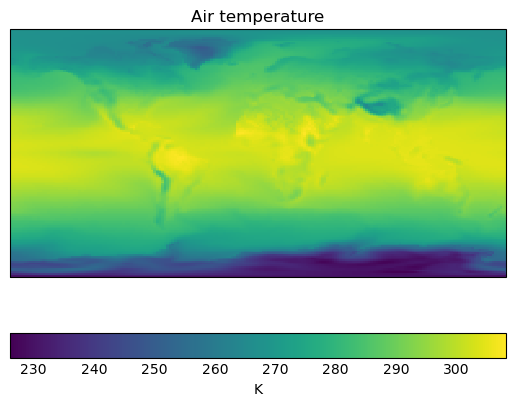

In [13]:
qplt.pcolormesh(A1B_cube)
plt.show()

**Step 6:** Repeat step 5 but this time:
* add a title using `plt.title('Air Temperature (A1B)')`
* add coastlines using `plt.gca().coastlines()`

Finally, use `plt.show()` to show the result.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


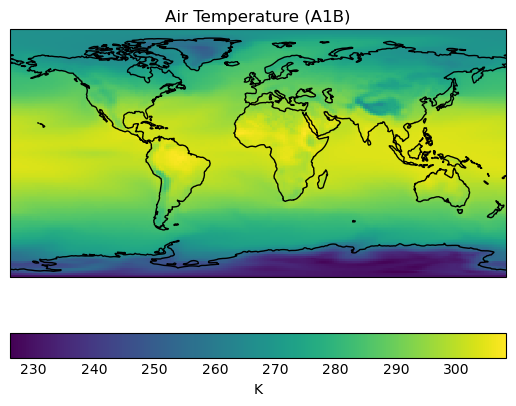

In [14]:
qplt.pcolormesh(A1B_cube)
plt.title('Air Temperature (A1B)')
plt.gca().coastlines()
plt.show()

**Step 7:** Now you are going to create 3 subplots, one subplot for `A1B_cube`, one subplot for `E1_cube` and one subplot for the `difference` cube. 

* Use `plt.figure(figsize=(20,12))` to set the size of the figure

Then for each plot:
* Use `plt.subplot(1, 3, n)` to create each of the 3 subplots. _Note matplotlib uses 1-based counting_
* Use `qplt.pcolormesh` to plot the cube
    * When plotting the difference cube, use a colormap `cmap="bwr`
* Use `plt.title` to add a title of your choice
* Use `plt.gca().coastlines()` to "get the current axes" and add coastlines


And finally, use `plt.show()` to show the result.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um

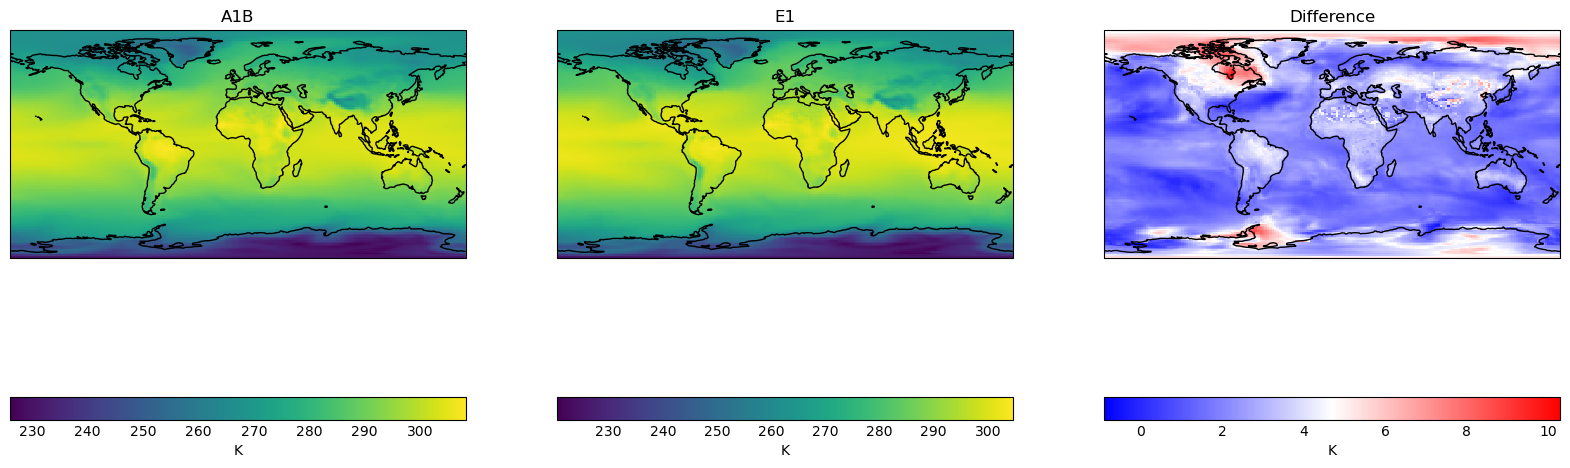

In [15]:
plt.figure(figsize=(20,12))

plt.subplot(1, 3, 1)
qplt.pcolormesh(A1B_cube)
plt.title("A1B")
plt.gca().coastlines()

plt.subplot(1, 3, 2)
qplt.pcolormesh(E1_cube)
plt.title("E1")
plt.gca().coastlines()

plt.subplot(1, 3, 3)
qplt.pcolormesh(difference, cmap="bwr")
plt.title('Difference')
plt.gca().coastlines()

plt.show()

**Step 8:** Repeat step 7 but this time we want the `difference` plot to have a symmetrical colobar. To do this:

* Calculate the maximum absolute difference, i.e.<br>
    `maxabs = np.abs(difference.data).max()`
* Use this to set the `vmin` and `vmax` in the call to pcolormesh, i.e. <br>
    `qplt.pcolormesh(difference, cmap="bwr", vmin=-maxabs, vmax=maxabs)`

Finally, use `plt.show()` to show the result.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um

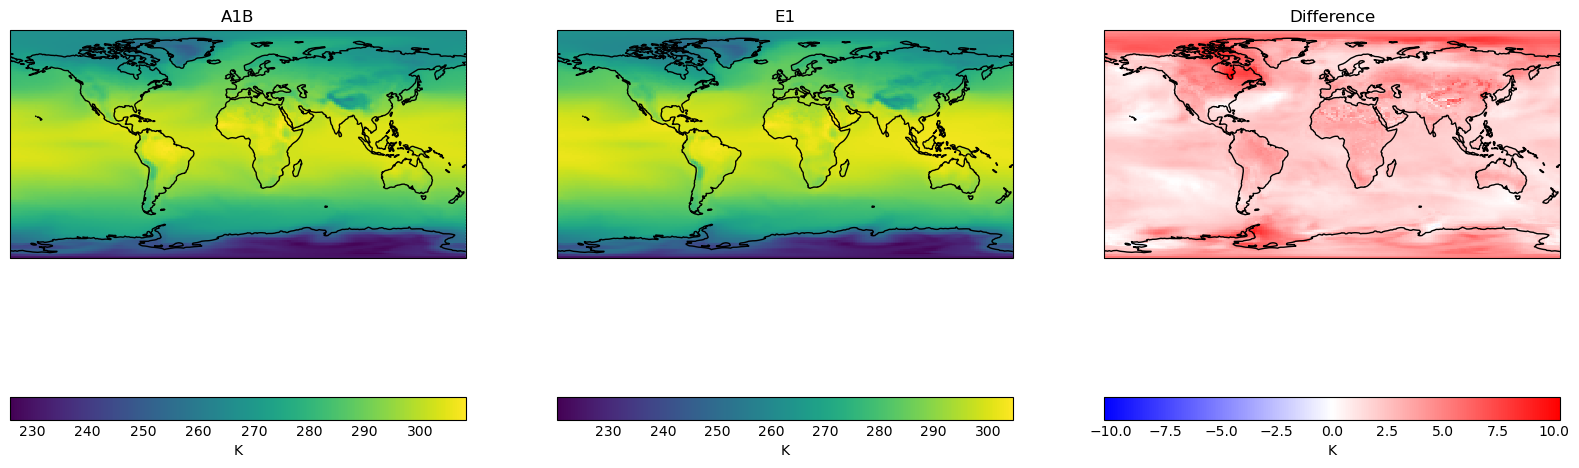

In [16]:
plt.figure(figsize=(20,12))

plt.subplot(1, 3, 1)
qplt.pcolormesh(A1B_cube)
plt.title("A1B")
plt.gca().coastlines()

plt.subplot(1, 3, 2)
qplt.pcolormesh(E1_cube)
plt.title("E1")
plt.gca().coastlines()

plt.subplot(1, 3, 3)
maxabs = np.abs(difference.data).max()
qplt.pcolormesh(difference, cmap="bwr", vmin=-maxabs, vmax=maxabs)
plt.title('Difference')
plt.gca().coastlines()

plt.show()

## Exercise 2: Plot the average annual temperature

**Step 1:** Use `iris.load_cube` to load in the file containing data for the A1B scenario over North America,  `iris.sample_data_path("A1B_north_america.nc")` and constrain to the STASH code `"m01s03i236"`. Print the result.

In [17]:
A1B_cube = iris.load_cube(iris.sample_data_path("A1B_north_america.nc"), "m01s03i236")
print(A1B_cube)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
    Dimension coordinates:
        time                             x              -              -
        latitude                         -              x              -
        longitude                        -              -              x
    Auxiliary coordinates:
        forecast_period                  x              -              -
    Scalar coordinates:
        forecast_reference_time     1859-09-01 06:00:00
        height                      1.5 m
    Cell methods:
        mean                        time (6 hour)
    Attributes:
        Conventions                 'CF-1.5'
        Model scenario              'A1B'
        STASH                       m01s03i236
        source                      'Data from Met Office Unified Model 6.05'


/var/tmp/ipykernel_96657/838959274.py:1: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  A1B_cube = iris.load_cube(iris.sample_data_path("A1B_north_america.nc"), "m01s03i236")


**Step 2:** Repeat step 1 with the file for the E1 scenario over North America,  `iris.sample_data_path("A1B_north_america.nc")` and again constrain to the STASH code `m01s03i236`. Print the result.

In [ ]:
E1_cube = iris.load_cube(iris.sample_data_path("E1_north_america.nc"))
print(E1_cube)

**Step 3:** Use `qplt.plot` to plot the `A1B_cube` for the first latitude point and first longitude point and all timesteps. <br>
_Hint: You can select the appropriate sub cube using `A1B_cube[:, 0, 0]`_. 

Use `plt.show()` to show the result.

In [ ]:
qplt.plot(A1B_cube[:, 0, 0])
plt.show()

**Step 4:** Repeat step 3, but this time
* plot both `A1B_cube[:, 0, 0]` and `E1_cube[:, 0, 0]` on the same axes. This can be done by calling `qplt.plot` twice, once for each cube. 
* Add a legend to the plot. To do this add a "label" as an argument to the `qplt.plot` function which specifies the text, i.e. <br>
`qplt.plot(A1B_cube[:, 0, 0], label="A1B scenario")`<br>
And use `plt.legend()` to tell matplotlib to add the legend to the plot

Then use `plt.show` to show the result.

In [ ]:
qplt.plot(A1B_cube[:, 0, 0], label="A1B scenario")
qplt.plot(E1_cube[:, 0, 0], label="E1 scenario")
plt.legend()
plt.show()

## Exercise 3: Plot wind speeds over Lake Victoria

**Step 1:** Use `iris.load_cube` to load in the file `iris.sample_data_path("wind_speed_lake_victoria.pp")`, constraining to `"x_wind"`. Print the result.

In [ ]:
xwind_cube = iris.load_cube(iris.sample_data_path("wind_speed_lake_victoria.pp"), "x_wind")
print(xwind_cube)

**Step 2:** Repeat step 1, but this time constrain to `"y_wind"`. Print the result.

In [ ]:
ywind_cube = iris.load_cube(iris.sample_data_path("wind_speed_lake_victoria.pp"), "y_wind")
print(ywind_cube)

**Step 3:** Compute the wind speed as follows `(xwind_cube**2 + ywind_cube**2) ** 0.5`

In [ ]:
windspeed_cube = (xwind_cube**2 + ywind_cube**2) ** 0.5

**Step 4:** Rename the new windspeed cube using `windspeed_cube.rename("windspeed")`. Print the result.<br>
_Note: `windspeed_cube.rename("windspeed")` is an "inplace" operation so you don't need to assign it to a new variable._

In [ ]:
windspeed_cube.rename("windspeed")
print(windspeed_cube)

**Step 5:** Use `qplt.contourf` to plot the windspeed. Use `plt.show()` to show the result.

In [ ]:
qplt.contourf(windspeed_cube)
plt.show()

**Step 6:** Repeat step 5, but this time add the outline of the lakes to the map:
* Create a lakes feature, `lakes = cfeat.NaturalEarthFeature("physical", "lakes", "50m", facecolor="none")`
* Add the feature with `plt.gca().add_feature(lakes)`

And use `plt.show()` to show the result

In [ ]:
qplt.contourf(windspeed_cube)
lakes = cfeat.NaturalEarthFeature("physical", "lakes", "50m", facecolor="none")
plt.gca().add_feature(lakes)
plt.show()

**Step 7:** Repeat step 6, but this time also:
* use `iplt.quiver(xwind_cube, ywind_cube, pivot="middle")` to add wind quivers
* use `plt.title` to add a suitable title

And use `plt.show()` to show the result

In [ ]:
qplt.contourf(windspeed_cube)
lakes = cfeat.NaturalEarthFeature("physical", "lakes", "50m", facecolor="none")
plt.gca().add_feature(lakes)
iplt.quiver(xwind_cube, ywind_cube, pivot="middle")
plt.title("Wind speed over Lake Victoria")
plt.show()